## 9.2 가우시안 혼합

- 가우시안 혼합 모델(GMM)은 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델임
- 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성
- 일반적으로 이 클러스터는 타원형

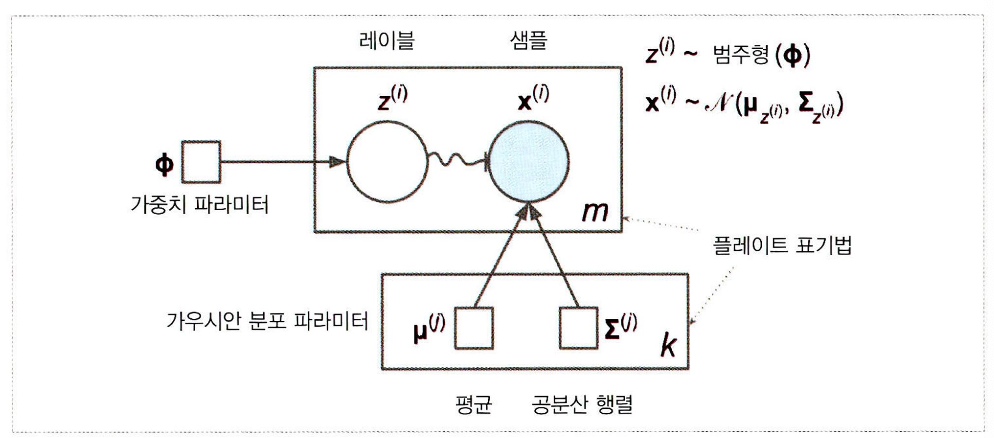

- 원은 확률 변수를 나타냄
- 사각형은 고정값을 나타냄(즉, 모델의 파라미터)
- 큰 사각형을 플레이트라고 부름. 사각형 안의 내용이 여러 번 반복됨.
- 각 플레이트 오른쪽 아래의 숫자는 얼마나 플레이트 안의 내용이 반복되는지를 표시.
- 각 변수 z(i)는 가중치 ∅를 갖는 범주형 분포에서 샘플링함
- 실선 화살표는 조건부 의존성을 표현
- z(i)에서 X(i)까지 구불구불한 화살표는 스위치를 나타냄.
- 색이 채워진 원은 알려진 값을 의미.

In [ ]:
import numpy as np

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [ ]:
gm.weights_

array([0.592302  , 0.20436684, 0.20333116])

In [ ]:
gm.means_

array([[ 0.49582318,  0.25177682],
       [ 1.73822659, -0.0598721 ],
       [-0.74583831,  0.55859469]])

In [ ]:
gm.covariances_

array([[[ 0.16898496, -0.10300066],
        [-0.10300066,  0.29607221]],

       [[ 0.05253934,  0.06191491],
        [ 0.06191491,  0.0890928 ]],

       [[ 0.05245159,  0.060355  ],
        [ 0.060355  ,  0.08898726]]])

- 실제 이 데이터를 생성하기 위해 사용한 가중치는 0.2, 0.4, 0.4임.
- 평균과 분산 행렬도 이 알고리즘이 찾은 것과 매우 비슷함.
- 이 클래스는 **기댓값-최대화(EM)** 알고리즘을 사용(k-평균 알고리즘과 공통점이 많음)
- 클러스터 파라미터를 랜덤하게 초기화하고 수렴할 때가지 두 단계를 반복
  - 샘플을 클러스터에 할당(기댓값 단계)
  - 클러스터를 업데이트(최대화 단계)
  - 클러스터에 속할 추정 확률로 샘플에 가중치가 적용됨, 이 확률을 샘플에 대한 클러스터의 **책임**이라고 함.

In [ ]:
gm.converged_

True

In [ ]:
gm.n_iter_

17

In [ ]:
gm.predict(X) # 하드 군집

array([2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 1, 2,
       0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 2,
       1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0,

In [ ]:
gm.predict_proba(X) # 소프트 군집

array([[2.63386881e-004, 5.17862186e-197, 9.99736613e-001],
       [1.00000000e+000, 1.02217731e-076, 3.54664451e-022],
       [3.70858260e-004, 1.91488672e-178, 9.99629142e-001],
       ...,
       [1.00000000e+000, 6.03027748e-108, 1.29475826e-011],
       [1.31584982e-003, 9.98684150e-001, 6.36699530e-142],
       [1.00000000e+000, 5.17495273e-076, 1.03795723e-023]])

In [ ]:
# 가우시안 혼합 모델은 생성 모델임. 즉, 이 모델에서 새로운 샘플을 만들 수 있음.
X_new, y_new = gm.sample(6)
X_new

array([[ 0.79517054,  0.19236755],
       [-0.2833323 ,  0.56319456],
       [ 0.86129809, -0.1265431 ],
       [ 0.87603271, -0.45466434],
       [-0.4557667 ,  0.88770638],
       [-0.56954552,  0.74086664]])

In [ ]:
y_new

array([0, 0, 0, 0, 2, 2])

In [ ]:
# 샘플이 주어지면 이 메서드는 그 위치의 확률 밀도 함수(PDF)의 로그로 예측.
# 점수가 높을수록 밀도가 높음.
gm.score_samples(X)

array([-4.94630293e-01, -1.69524387e+00, -1.97918583e+00, -2.02533460e+00,
       -7.25838870e-01, -9.45181804e-01, -1.66800593e+00, -1.92773497e+00,
       -1.91984314e+00, -3.82299762e-01, -1.58183718e+00, -2.06735469e+00,
       -1.47442665e+00, -1.56960130e+00, -1.49072792e+00,  2.81527529e-02,
       -5.99779864e-01, -2.02141774e+00, -1.86233748e+00, -1.51556466e+00,
       -1.52167867e+00, -2.40587012e-01, -1.61298465e+00, -1.76059258e+00,
       -2.85923019e+00, -1.53730638e+00, -7.03062575e-01, -1.39166158e+00,
       -1.27555747e+00, -2.06722226e+00, -1.48780705e+00, -1.54195413e+00,
       -2.20153352e+00, -1.61918854e+00, -1.04566469e+00, -1.41007178e+00,
       -2.19392795e+00, -1.73922950e+00, -7.43920222e-02, -1.05856106e+00,
       -1.91409645e+00, -1.70721551e+00, -9.59899551e-01, -2.13919141e+00,
       -7.73259908e-02, -1.81661173e+00, -7.92352408e-02, -1.85526084e+00,
       -1.61909249e+00, -9.64733680e-01, -1.48958533e+00, -2.17536429e+00,
       -1.39198221e+00, -

- 사이킷런에서 covariance_type 매개변수에 다음 값 중 하나를 설정
  - spherical : 모든 클러스터가 원형. 하지만 지름은 다를 수 있음(즉 분산이 다름)
  - diag : 클러스터는 크기에 상관없이 어떤 타원형도 가능. 하지만 타원 축은 좌표 축과 나란해야 함. (즉 공분산 행렬이 대각 행렬이어야 함)
  - tied : 모든 클러스터가 동일한 타원 모양, 크기, 방향을 가짐 (즉 모든 클러스터는 동일한 공분산 행렬을 공유)
- covariance_type 매개변수의 기본값은 "full"임. 각 클러스터는 모양, 크기, 방향에 제약이 x. (각자 제약 없는 공분산 행렬을 가짐)


### 9.2.1 가우시안 혼합을 사용한 이상치 탐지

- **이상치 탐지(outlier detection)**는 보통과 많이 다른 샘플을 감지하는 작업 -> 이를 **이상치**라고 부름. 보통 샘플은 **정상치**라고 함.

- 가우시안 혼합 모델을 이상치 탐지에 사용하는 방법:
  - 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 볼 수 있음. 이렇게 하려면 사용할 밀도 임곗값을 정해야 함.
  - 거짓 양성이 너무 많다면 임계값을 더 낮춤.
  - 거짓 음성이 너무 많다면 임계값을 더 높임.
  - 일반적인 정밀도/재현율 트레이드 오프임.

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

- 이상치 탐지와 비슷한 작업은 **특이치 탐지**임.
- 이 알고리즘은 이상치로 오염되지 않은 '깨끗한' 데이터셋에서 훈련한다는 것이 이상치 탐지와 다름.

### 9.2.2 클러스터 개수 선택하기

- 가우시안 혼합에서는 이너셔나 실루엣 점수를 사용할 수 x
- 대신 정의된 BIC(Bayesian information criterion)나 AIC(Akaike information criterion)와 같은 이론적 정보 기준을 최소화하는 모델을 찾음.

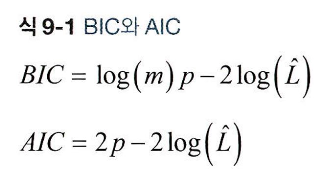
- m: 샘플의 개수
- p: 모델이 학습할 파라미터 개수
- L_hat: 모델의 가능도 함수의 최댓값

In [ ]:
gm.bic(X)

np.float64(2814.0056634807374)

In [ ]:
gm.aic(X)

np.float64(2730.573823738041)

### 9.2.3 베이즈 가우시안 혼합 모델

- 최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 (또는 0에 가깝게) 만드는 BayesianGaussianMixture 클래스 사용 가능
- 클러스터 개수 n_componnets를 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지정.
- 이 알고리즘은 자동으로 불필요한 클러스터를 제거.

In [ ]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

/usr/local/lib/python3.12/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.15, 0.1 , 0.19, 0.12, 0.11, 0.13, 0.14, 0.07, 0.  , 0.  ])

- 위 모델에서 클러스터 파라미터(가중치, 평균, 공분산 행렬 등)는 더는 고정된 모델 파라미터가 아니라 클러스터 할당처럼 잠재 확률 변수로 취급됨.
- 따라서 z는 클러스터 파라미터와 클러스터 할당을 모두 포함.
- **베타 분포**는 고정 범위 안에 놓은 값을 가진 확률 변수를 모델링할 때 자주 사용됨.

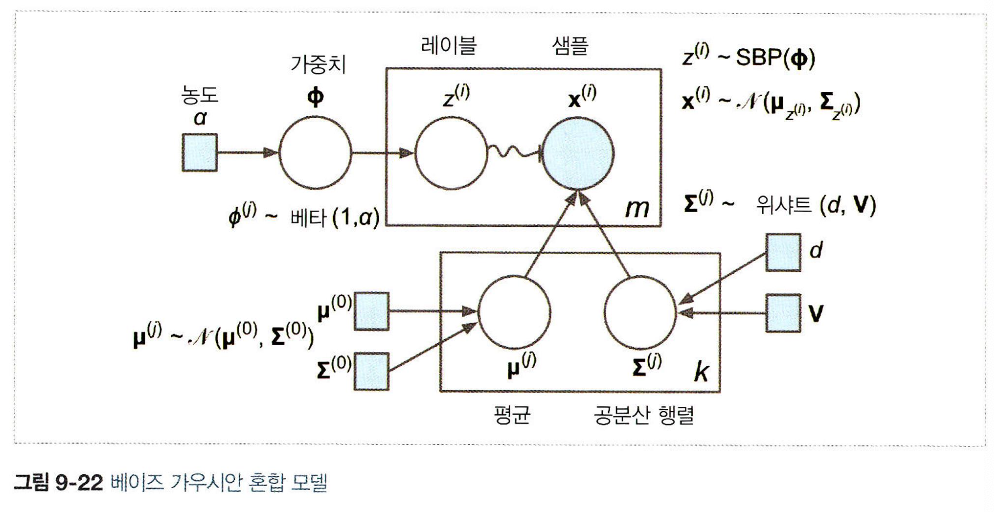

**베이즈 가우시안 혼합 모델**
- 파라미터 d와 V가 클러스터 분포 모양을 제어
- 잠재 변수 z에 대한 사전 지식이 **사전 확률**이라는 확률 분포 p(z)에 인코딩될 수 있음.
- ex. 클러스터가 적을 것이라는 **사전 믿음(낮은 농도)**를 가질 수 있음.
- 사전 믿음은 'weight_concentration_prior' 매개변수를 사용해 조정

베이즈 정리

- 데이터 X를 관측하고 난 후 잠재 변수에 대한 확률 분포를 업데이트하는 방법ㅇ르 설명
- 이는 X가 주어졌을 때 z의 조건부 확률인 **사후 확률 분포** p(z|X)을 계산

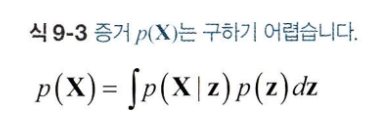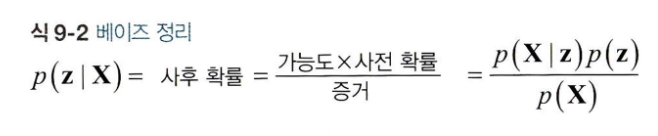

- 가우시안 혼합 모델에서 분모인 p(X)는 계산하기 힘듦(가능한 모든 z값에 대해 적분해야 하기 때문.)
- 모든 클러스터 파라미터와 클러스터 할당의 조합을 고려해야 함.
-> 이것이 베이즈 통계학에 있는 주요 문제임
- 해결 방법: 변분 추론, 자체적인 변분 파라미터 𝜆(람다)를 가진 분포 패밀리 q(z; 𝜆)를 선택
- 그 다음 q(z)가 p(z|X)의 좋은 근삿값이 되도록 파라미터를 최적화

### 9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

- PCA: inverse_transform() 메서드를 가진 다른 차원 축소 방법
- Fast-MCD(minimum covariance determinant): 이상치 감지에 유용
- 아이솔레이션 포레스트: 고차원 데이터에서 이상치 감지에 효율적임
- LOF(local outlier factor): 주어진 샘플 주위의 밀도와 이웃 주위의 밀도를 비교
- one-class SVM: 특이치 탐지에 유용